In [57]:
#Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
import plotly.express as px
from countries_dataset import countries
from codes import country_codes


In [58]:
#Import excel files after initial row cleaning

#Production data in thousands 60kg bags
df_production = pd.read_excel('datasets/1a - Total production.xlsx',skiprows=3,skipfooter=3) 
df_production['Country'] = df_production['Country'].str.lstrip()
df_production['Code'] = df_production['Country'].map(country_codes)
df_production['Continent'] = df_production['Country'].map(countries)

#Domestic Consumption data in thousands 60kg bags
df_consumption = pd.read_excel('datasets/1b - Domestic consumption.xlsx',skiprows=3,skipfooter=3) 
df_consumption['Country'] = df_consumption['Country'].str.lstrip()
df_consumption['Code'] = df_consumption['Country'].map(country_codes)
df_consumption['Continent'] = df_consumption['Country'].map(countries)

#Gross Openings 
df_openings = pd.read_excel('datasets/1d - Gross Opening stocks.xlsx',skiprows=3,skipfooter=3) 
df_openings['Country'] = df_openings['Country'].str.lstrip()
df_openings['Code'] = df_openings['Country'].map(country_codes)
df_openings['Continent'] = df_openings['Country'].map(countries)

#Exports in thousands 60kg bags
df_exports = pd.read_excel('datasets/1e - Exports - crop year.xlsx',skiprows=3,skipfooter=3) 
df_exports['Country'] = df_exports['Country'].str.lstrip()
df_exports['Code'] = df_exports['Country'].map(country_codes)
df_exports['Continent'] = df_exports['Country'].map(countries)

#Imports in thousands 60kg bags
df_imports = pd.read_excel('datasets/2b - Imports.xlsx',skiprows=3,skipfooter=3) 
df_imports['Country'] = df_imports['Country'].str.lstrip()
df_imports['Code'] = df_imports['Country'].map(country_codes)
df_imports['Continent'] = df_imports['Country'].map(countries)

d:\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

d:\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



In [59]:
# sort the resulting DataFrame by production in descending order and select the top 10 countries
top_10_producing_countries = df_production[['Country','Code','Totals']].sort_values(by='Totals', ascending=False).head(10)

# print the resulting DataFrame
print(top_10_producing_countries)


      Country Code        Totals
2      Brazil  BRA  1.251382e+06
53    Vietnam  VNM  4.800550e+05
23   Colombia  COL  3.599796e+05
5   Indonesia  IDN  2.567497e+05
29   Ethiopia  ETH  1.444943e+05
36      India  IND  1.370363e+05
41     Mexico  MEX  1.308928e+05
32  Guatemala  GTM  1.170068e+05
35   Honduras  HND  1.112128e+05
51     Uganda  UGA  9.865552e+04


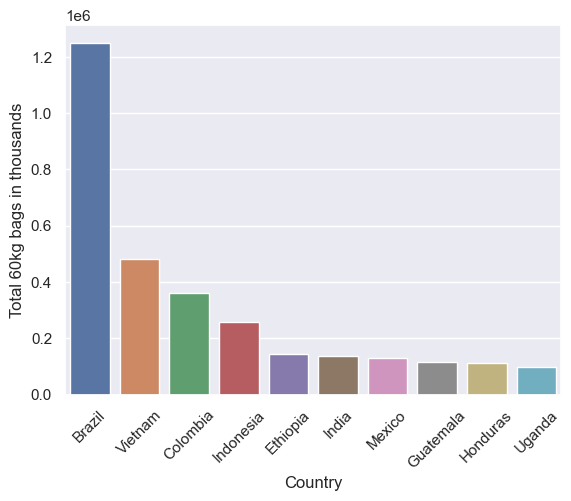

In [60]:
# plot the top 10 producing countries with Seaborn using a bar chart
sns.barplot(x='Country', y='Totals', data=top_10_producing_countries,)
# Edit y axis with "Total 60kg bags in thousands"
plt.ylabel('Total 60kg bags in thousands')
# Edit the y axis to show the scale in thousands, not in scientific notation

# Edit the x axis countries to display them diagonally
plt.xticks(rotation=45)
plt.show()

In [82]:
# Create a cloropeth map for the producing countries using the folium library


# Create a figure using Plotly Express' `px.choropleth` function
fig = px.choropleth(
    df_production[['Country','Code','Totals']],
    #geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
    locations='Code',
    color='Totals',
    hover_name='Country',
    color_continuous_scale='YlOrRd',
    range_color=(0, 1500000),
    scope='world',
)

# Update the layout of the figure
fig.update_layout(
    title='Production Totals by Country',
    margin={'r': 0, 't': 40, 'l': 0, 'b': 10},
)

# Show the figure
fig.show()